This code sets up a neural network model and then trains it using the MNIST dataset. The goal is to create a model capable of recognizing handwritten digits based on the provided training data.

In [2]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.2/38.1 MB 2.6 MB/s eta 0:00:15
   ---------------------------------------- 0.4/38.1 MB 3.3 MB/s eta 0:00:12
    --------------------------------------- 0.6/38.1 MB 3.5 MB/s eta 0:00:11
    --------------------------------------- 0.9/38.1 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.3/38.1 MB 5.2 MB/s eta 0:00:08
   - -------------------------------------- 1.6/38.1 MB 5.4 MB/s eta 0:00:07
   -- ------------------------------------- 1.9/38.1 MB 5.6 MB/s eta 0:00:07
   -- ------------------------------------- 2.3/38.1 MB 5.9 MB/s eta 0:00:07
   -- ---------

In [4]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)


Epoch 1/3


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9243
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1036 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0723 - accuracy: 0.9771


In [16]:
accuracy, loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1031 - accuracy: 0.9705


In [17]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model\assets


INFO:tensorflow:Assets written to: digits.model\assets


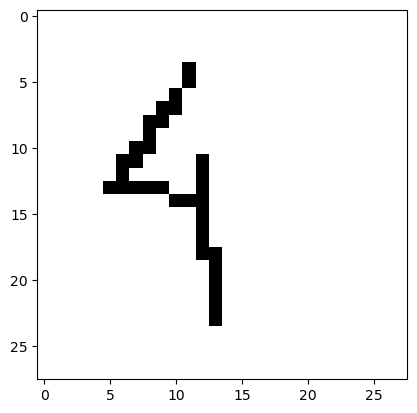

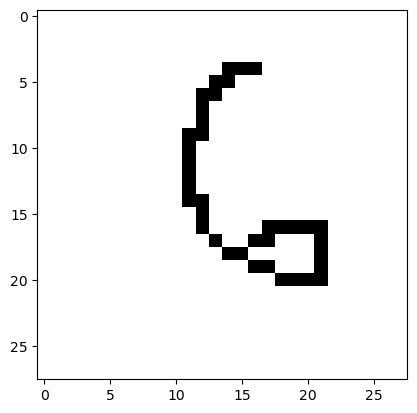

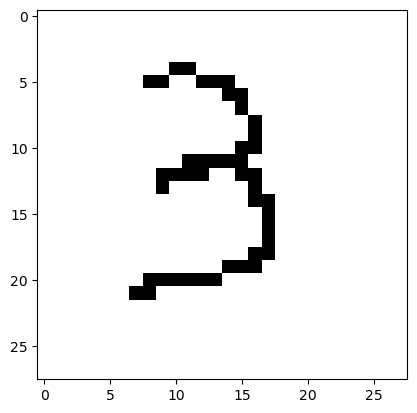

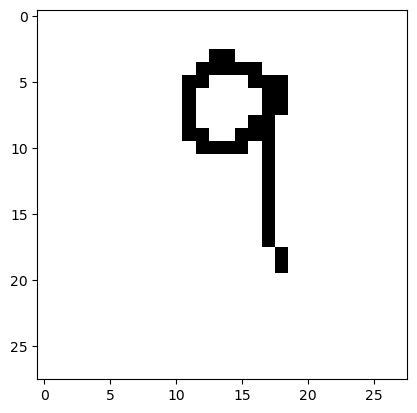

In [19]:

for x in range (1,5):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()

1/1 [==============================] - 0s 25ms/step


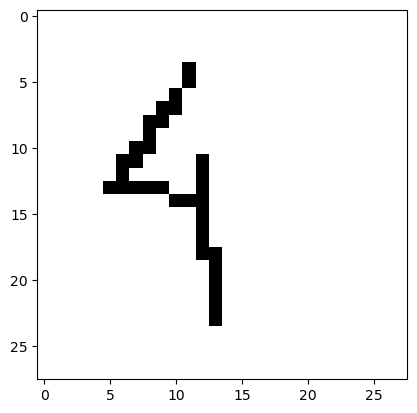

Digit probably is: 8
1/1 [==============================] - 0s 28ms/step


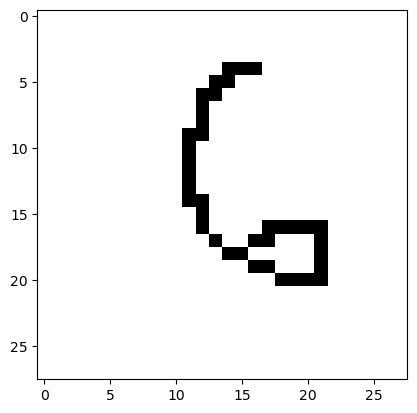

Digit probably is: 5
1/1 [==============================] - 0s 26ms/step


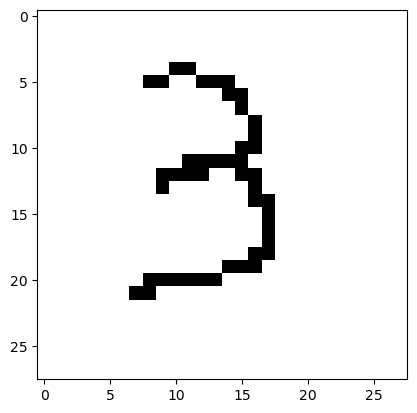

Digit probably is: 3
1/1 [==============================] - 0s 27ms/step


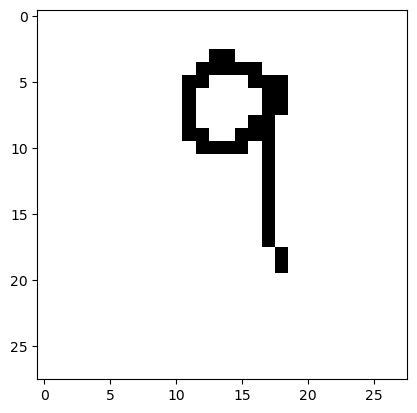

Digit probably is: 9


In [21]:
for x in range (1,5):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
    print(f'Digit probably is: {np.argmax(prediction)}')